**Хоружий Кирилл, Б02-929, B2**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Задача 1*

Подробна была у меня решена в №3, B1.
Там же сравнение с аналитическими выражениями и проанализирована сходимость.

# Задача 2

In [119]:
M = np.random.random((3, 3))
M

array([[0.77467205, 0.45172136, 0.72094734],
       [0.6413334 , 0.57511709, 0.07207487],
       [0.27554986, 0.4805229 , 0.15709196]])

In [130]:
def get_L2(A):
    return (np.max(np.linalg.eigvals(A.T @ A)))**0.5

In [126]:
def get_frobenius_norm(M):
    u, s, vh = np.linalg.svd(M)
    return np.sum(s ** 2) ** 0.5

In [129]:
print("из коробки: {:.5f}".format(np.linalg.norm(M, ord="fro")))
print("написанное: {:.5f}".format(get_frobenius_norm(M)))

из коробки: 1.55007
написанное: 1.55007


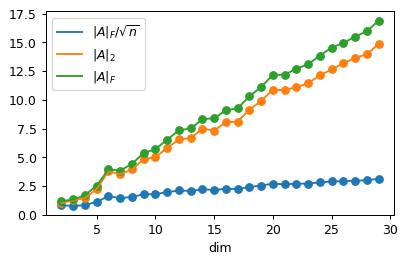

In [158]:
dim = 2
rep = 100
M = np.random.random((dim, dim))
vals = np.zeros(3)
for i in range(rep):
    vals += np.array([1/np.sqrt(dim) * get_frobenius_norm(M), get_L2(M), get_frobenius_norm(M)])/rep

for dim in range(3, 30):
    M = np.random.random((dim, dim))
    v = np.zeros(3)
    for i in range(rep):
        v += np.array([1/np.sqrt(dim) * get_frobenius_norm(M), get_L2(M), get_frobenius_norm(M)])/rep
    vals = np.vstack([vals, v])

x = [2] + list(range(3, 30))
y1 = vals[:, 0]
y2 = vals[:, 1]
y3 = vals[:, 2]

fig, ax = plt.subplots(dpi=90, figsize=(5, 3))

plt.plot(x, y1, label="$\|A\|_F/\\sqrt{n}$")
plt.scatter(x, y1)
plt.plot(x, y2, label="$\|A\|_2$")
plt.scatter(x, y2)
plt.plot(x, y3, label="$\|A\|_F$")
plt.scatter(x, y3)
plt.legend()
plt.xlabel("dim")
plt.show()

# Задача 3

In [211]:
dim = 3
M = np.random.random((dim, dim))
A = M.T @ M
CH = np.linalg.cholesky(A)
np.random.normal(1, 2, dim)

array([ 2.16589818, -1.36238493,  2.06346077])

In [213]:
dim = 3;
N = 10000;
def get_fix_rand(A):
    CH = np.linalg.cholesky(A)
    z = np.random.normal(0, 1, (dim, N))
    return CH @ z

In [214]:
v1 = get_fix_rand(A)[0]
v2 = get_fix_rand(A)[1]
v3 = get_fix_rand(A)[2]

In [212]:
A

array([[0.77281343, 0.787717  , 0.51980687],
       [0.787717  , 1.24642997, 0.6688954 ],
       [0.51980687, 0.6688954 , 0.41081872]])

In [217]:
np.cov(v1, v2)[0][0]

0.7740483952740266

In [219]:
np.cov(v1, v2)[1][1]

1.242675862377206

In [220]:
np.cov(v2, v3)[1][1]

0.4143240041142865

# Задача 4

In [58]:
def procrust_transform(M1, M2):
    v1_bar = np.mean(M1, axis=0)
    v2_bar = np.mean(M2, axis=0)
    
    M1_tilde = M1 - v1_bar
    M2_tilde = M2 - v2_bar
    
    SVD_base = M1_tilde.T @ M2_tilde
    u, s, vh = np.linalg.svd(SVD_base)

    R = u @ vh
    mu = v2_bar - R.T @ v1_bar
    return R, mu

In [90]:
def plot_procrust_transform(M1, M2, flag=True):
    R, mu = procrust_transform(M1, M2)
    M1_im = M1@R+mu

    x2 = M2[:, 0]
    y2 = M2[:, 1]

    x1 = M1[:, 0]
    y1 = M1[:, 1]

    x1_im = M1_im[:, 0]
    y1_im = M1_im[:, 1]

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].scatter(x1, y1)
    axs[0].scatter(x2, y2)
    axs[1].scatter(x1_im, y1_im)
    axs[1].scatter(x2, y2)
    
    if flag:
        axs[0].plot(x1, y1)
        axs[0].plot(x2, y2)
        axs[1].plot(x1_im, y1_im)
        axs[1].plot(x2, y2)
    

    plt.show()

Похожи

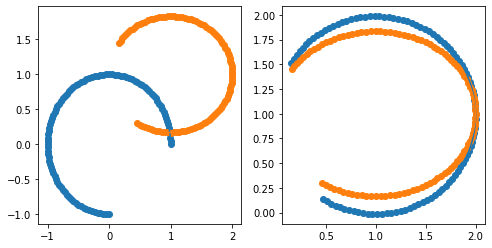

In [116]:
# генерируем M1 и M2
phi = np.linspace(0, 3/2 * np.pi, 100)
x1 = np.cos(phi)
y1 = np.sin(phi)
M1 = np.vstack([x1, y1]).T

phi = np.linspace(np.pi+1, 5/2 * np.pi+1, 100)
x2 = np.cos(phi)+ 1
y2 = np.sin(phi)/1.2+1
M2 = np.vstack([x2, y2]).T

# визуализируем
plot_procrust_transform(M1, M2)

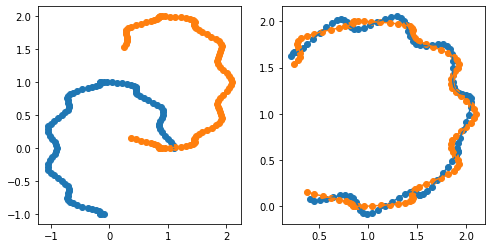

In [72]:
# генерируем M1 и M2
phi = np.linspace(0, 3/2 * np.pi, 100)
x1 = np.cos(phi) + np.cos(10 * phi)/10
y1 = np.sin(phi)
M1 = np.vstack([x1, y1]).T

phi = np.linspace(np.pi+1, 5/2 * np.pi+1, 100)
x2 = np.cos(phi) + np.cos(10 * phi)/10 + 1
y2 = np.sin(phi) + 1
M2 = np.vstack([x2, y2]).T

# визуализируем
plot_procrust_transform(M1, M2)

Сильно разные фигуры

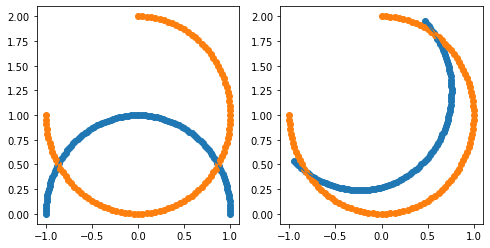

In [86]:
# генерируем M1 и M2
phi = np.linspace(0, 1 * np.pi, 100)
x1 = np.cos(phi) 
y1 = np.sin(phi)
M1 = np.vstack([x1, y1]).T

phi = np.linspace(np.pi, 5/2 * np.pi, 100)
x2 = np.cos(phi)
y2 = np.sin(phi) + 1
M2 = np.vstack([x2, y2]).T

# визуализируем
plot_procrust_transform(M1, M2)

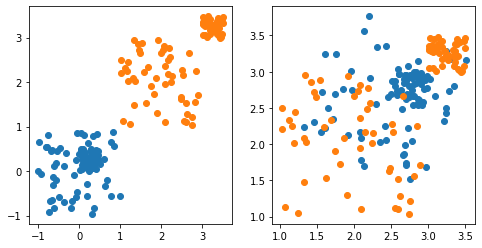

In [117]:
# cлучайные точки
a = 50;
b = 50;

M1 = np.concatenate([np.random.uniform(-1, 1, (a,2)),np.random.uniform(0, .5, (b,2))])
M2 = np.concatenate([np.random.uniform(-1, 1, (a,2)),1+np.random.uniform(0, .5, (b,2))])+2
plot_procrust_transform(M1, M2, False)

# Задача 5